<a href="https://colab.research.google.com/github/nguyenanhtienabcd/M03_PROJECT_HEART_DISEASE_PREDICTION/blob/feature%2Fdisease_prediction/M03_project_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## download data

In [1]:
!gdown 1oGsM9EAFWiE28jDXT1IKhWwsqzIOcXcN

Downloading...
From: https://drive.google.com/uc?id=1oGsM9EAFWiE28jDXT1IKhWwsqzIOcXcN
To: /content/cleveland.csv
100% 10.9k/10.9k [00:00<00:00, 23.4MB/s]


## Ex1: data visualization

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/cleveland.csv')
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
1,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
2,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
3,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
4,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
5,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
6,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
7,63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2
8,53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,1
9,57,1,4,140,192,0,0,148,0,0.4,2,0.0,6.0,0


In [4]:
# chuyển đổi các dữ liệu lớn hơn 1 thành 1
df['target'] = df['target'].map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
# điền vào missing value giá trị mean
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


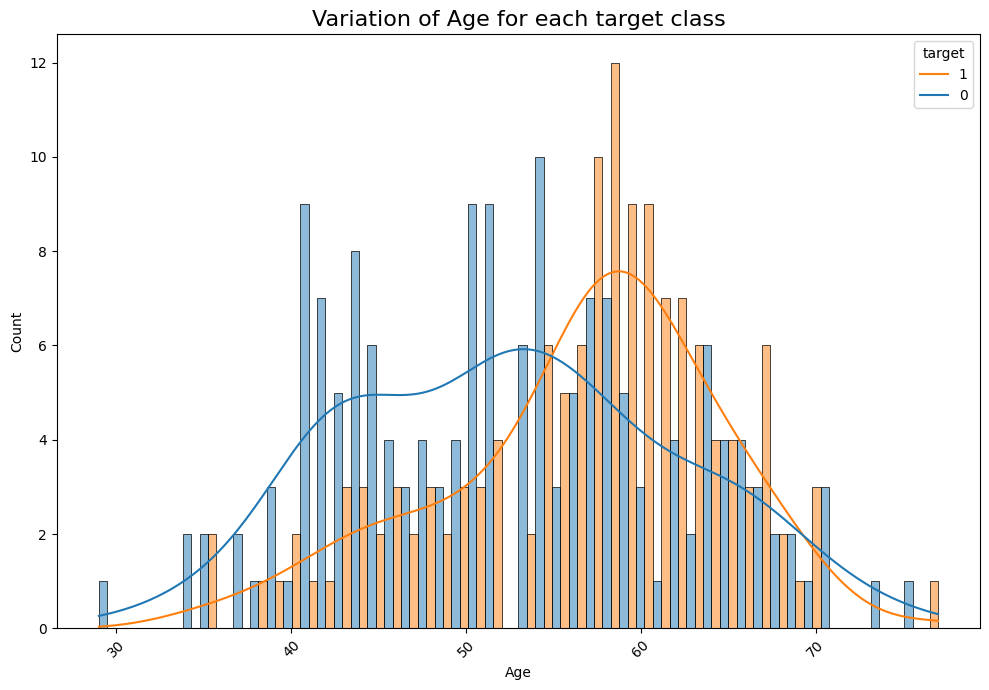

In [5]:
# tạo histogram with seaborn
plt.figure(figsize = (10,7)) # tạo khung
sns.histplot(data = df, x = 'age', hue = 'target',
             stat = 'count', bins=50, multiple='dodge',
             kde=True, shrink = 1) # vẽ histogram
plt.title("Variation of Age for each target class", fontsize = 16) # đặt tiêu đề
plt.xlabel("Age") # đặt tên trục x
plt.ylabel("Count") # đặt tên trục y
plt.xticks(rotation=45)
plt.legend(title='target', labels=['1', '0'])
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()

## Ex2: data visulaization

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


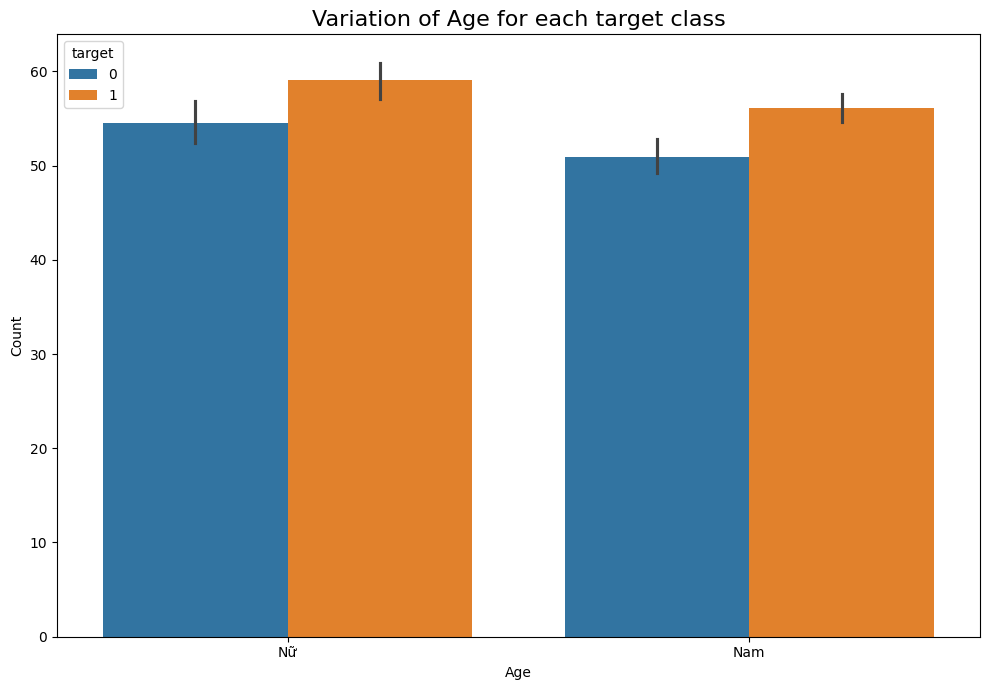

In [6]:
# tạo histogram with seaborn
plt.figure(figsize = (10,7)) # tạo khung
barplot = sns.barplot(data=df, x='sex', y='age', hue='target',legend = 'full')
plt.title("Variation of Age for each target class", fontsize = 16) # đặt tiêu đề
plt.xlabel("Age") # đặt tên trục x
plt.ylabel("Count") # đặt tên trục y
#plt.xticks(rotation=45)
plt.xticks(ticks=[0, 1], labels=['Nữ', 'Nam'])
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()

## Ex3:KNN

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [66]:
# dung iloc de co the lay duoc du lieu theo index
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
print(X)
print(y)

[[67.          1.          4.         ...  2.          2.
   7.        ]
 [37.          1.          3.         ...  3.          0.
   3.        ]
 [41.          0.          2.         ...  1.          0.
   3.        ]
 ...
 [57.          1.          4.         ...  2.          1.
   7.        ]
 [57.          0.          2.         ...  2.          1.
   3.        ]
 [38.          1.          3.         ...  1.          0.67449664
   3.        ]]
[1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1
 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0
 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0
 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 0 0
 0 0 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0
 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1
 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0
 1 0 0 1 1 1 1 1 0 1 0 

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [68]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [69]:
y_pred = knn.predict(X_test)
y_train_pred = knn.predict(X_train)
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm_train)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Confusion Matrix:
[[101  26]
 [ 31  82]]
Accuracy: 0.6229508196721312


In [70]:
print(cm_test)

[[23 13]
 [10 15]]


In [71]:
accuracy_for_train = np.round((cm_train[0,0]+cm_train[1,1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0,0]+cm_test[1,1])/len(y_test),2)
print("Accuracy for training set for KNN = {}".format(accuracy_for_train))
print("Accuracy for test set for KNN = {}".format(accuracy_for_test))

Accuracy for training set for KNN = 0.76
Accuracy for test set for KNN = 0.62


## Ex4: SVM

In [139]:
from sklearn.svm import SVC

In [140]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [142]:
sv = SVC(kernel='rbf', random_state = 42)
sv.fit(X_train, y_train)

SVC(random_state=42)

In [143]:
y_pred = sv.predict(X_test)
y_train_pred = sv.predict(X_train)
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_pred)

In [144]:
accuracy_for_train = np.round((cm_train[0,0]+cm_train[1,1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0,0]+cm_test[1,1])/len(y_test),2)
print("Accuracy for training set for SVM = {}".format(accuracy_for_train))
print("Accuracy for test set for SVM = {}".format(accuracy_for_test))

Accuracy for training set for SVM = 0.68
Accuracy for test set for SVM = 0.67


## Ex5: Naive bayes

In [72]:
#thư viện dử dụng training Naive Bayes

from sklearn.naive_bayes import GaussianNB

# khởi tạo mô hình
nb = GaussianNB()

# huấn luyện mô hình
nb.fit(X_train, y_train)

GaussianNB()

In [73]:
# dự đoạn mô hình
y_pred = nb.predict(X_test)
y_train_pred = nb.predict(X_train)

In [74]:
# tạo ma trận confusion
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print("cm_train: \n", cm_train)
print("cm_test: \n", cm_test)

Confusion Matrix:
cm_train: 
 [[114  13]
 [ 25  88]]
cm_test: 
 [[31  5]
 [ 5 20]]


In [75]:
# tính toán accuracy
accuracy_for_train = np.round((cm_train[0,0]+cm_train[1,1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print("Accuracy for training set for Naive Bayes = {}".format(accuracy_for_train))
print("Accuracy for test set for Naive Bayes = {}".format(accuracy_for_test))

Accuracy for training set for Naive Bayes = 0.84
Accuracy for test set for Naive Bayes = 0.84


## Ex6: Decision tree

In [76]:
from sklearn.tree import DecisionTreeClassifier


In [77]:
dc = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2)
dc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [78]:
y_pred = dc.predict(X_test)
y_train_pred = dc.predict(X_train)

In [79]:
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_pred)

In [80]:
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print("Accuracy for training set for Decision Tree = {}".format(accuracy_for_train))
print("Accuracy for test set for Decision Tree = {}".format(accuracy_for_test))

Accuracy for training set for Decision Tree = 1.0
Accuracy for test set for Decision Tree = 0.79


## Ex7: Random forest

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
rdf = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=10, min_samples_split=2, random_state=42)
rdf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=10, random_state=42)

In [83]:
y_pred = rdf.predict(X_test)
y_train_pred = rdf.predict(X_train)

In [84]:
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_pred)

In [85]:
accuracy_for_train = np.round((cm_train[0,0]+cm_train[1,1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print("Accuracy for training set for Random Forest = {}".format(accuracy_for_train))
print("Accuracy for test set for Random Forest = {}".format(accuracy_for_test))

Accuracy for training set for Random Forest = 0.99
Accuracy for test set for Random Forest = 0.8


## Ex8: Adaboosting

In [86]:
from sklearn.ensemble import AdaBoostClassifier

In [87]:
ada = AdaBoostClassifier(n_estimators=50, learning_rate=1.0)
ada.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [88]:
y_pred = ada.predict(X_test)
y_train_pred = ada.predict(X_train)

In [89]:
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_pred)

In [90]:
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print("Accuracy for training set for AdaBoost = {}".format(accuracy_for_train))
print("Accuracy for test set for AdaBoost = {}".format(accuracy_for_test))

Accuracy for training set for AdaBoost = 0.93
Accuracy for test set for AdaBoost = 0.84


## Ex9: Gradientboosting

In [95]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [94]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [97]:
gb = GradientBoostingClassifier( learning_rate=0.1, n_estimators=100,
                                subsample=1.0, min_samples_split=2,
                                 max_depth=3, random_state=42)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [98]:
y_pred = gb.predict(X_test)
y_train_pred = gb.predict(X_train)

In [99]:
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_pred)

In [100]:
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)

In [102]:
print("Accuracy for training set for Gradient Boosting = {}".format(accuracy_for_train))
print("Accuracy for test set for Gradient Boosting = {}".format(accuracy_for_test))

Accuracy for training set for Gradient Boosting = 1.0
Accuracy for test set for Gradient Boosting = 0.84


## Ex10: XGboost

In [109]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

In [110]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=4)

In [113]:
xgb_1 = XGBClassifier(objective="binary:logistic", random_state=42, n_estimators = 100)
xgb_1.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [114]:
y_pred = xgb_1.predict(X_test)
y_train_pred = xgb_1.predict(X_train)

In [115]:
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_pred)

In [116]:
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print()
print("Accuracy for training set for XGboost = {}".format(accuracy_for_train))
print("Accuracy for test set for XGboost = {}".format(accuracy_for_test))


Accuracy for training set for XGboost = 1.0
Accuracy for test set for XGboost = 0.84


## Ex11: Stacking

In [156]:
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split

In [157]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [159]:
stack = StackingClassifier(estimators=[('knn', knn), ('svm', sv), ('nb', nb), ('dc', dc), ('rdf', rdf), ('ada', ada), ('gb', gb), ('xgb', xgb_1)])
stack.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

StackingClassifier(estimators=[('knn', KNeighborsClassifier()),
                               ('svm', SVC(random_state=42)),
                               ('nb', GaussianNB()),
                               ('dc', DecisionTreeClassifier(max_depth=10)),
                               ('rdf',
                                RandomForestClassifier(max_depth=10,
                                                       n_estimators=10,
                                                       random_state=42)),
                               ('ada', AdaBoostClassifier()),
                               ('gb',
                                GradientBoostingClassifier(random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, b...
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...))])

In [160]:
y_pred = stack.predict(X_test)
y_train_pred = stack.predict(X_train)
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_pred)

In [162]:
accuracy_for_train = np.round((cm_train[0][0]+ cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print("Accuracy for training set for Stacking = {}".format(accuracy_for_train))
print("Accuracy for test set for Stacking = {}".format(accuracy_for_test))

Accuracy for training set for Stacking = 0.94
Accuracy for test set for Stacking = 0.85
